<a href="https://www.kaggle.com/code/hmahida/eda-automobile-dataset?scriptVersionId=118512419" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### load the automobile dataset and create their dataframes
automobile_df = pd.read_csv("/kaggle/input/cars-price/cars _price_data.csv", delimiter= ',')
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Basic Insight from the Data

In [3]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Use argument "include = 'all'" to get a summary of all the column with the object data-types
automobile_df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

For the purpose of this analysis we are not going to use the below columns. Remove the following columns ['curb-weight', 'engine-type', 'fuel-system', 'bore', 'stroke', 'compression-ratio'] from the data set as they will not be used in the analysis.

In [5]:
# Clean the data
# # Drop columns that are redundant or unnecessary
automobile_df.drop(labels = ['curb-weight', 'fuel-system', 'bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,engine-type,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,dohc,four,130,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,dohc,four,130,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,65.5,52.4,ohcv,six,152,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,66.2,54.3,ohc,four,109,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,66.4,54.3,ohc,five,136,115,5500,18,22,17450


Describe and Info methods:
This statistics done on the numeric data is quite useful and already provides us a lot of information about the min, max, standard deviation. It also confirms that they all have equal number of data in them
This analysis also shows that there are some columns which potentially have incorrect datatypes so that will need to be corrected

In [6]:
automobile_df.describe()

,symboling,wheel-base,length,width,height,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,126.907317,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,41.642693,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,61.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,97.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,120.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,141.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,326.000000,49.000000,54.000000


## Data Wrangling

### Dealing with missing values

In [7]:
# Drop missing rows with missing values in 'price', 'horsepower' and 'num-of-doors' colmns.
automobile_df.drop(automobile_df[automobile_df.price == '?'].index, inplace=True)
automobile_df.drop(automobile_df[automobile_df.horsepower == '?'].index, inplace=True)
automobile_df.drop(automobile_df[automobile_df['num-of-doors'] == '?'].index, inplace=True)

### Changing the datatype

In [8]:
automobile_df['horsepower'] = automobile_df['horsepower'].astype('int64')
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype('int64')
automobile_df['price'] = automobile_df['price'].astype('int64')

### Remove any duplicate rows

In [9]:
automobile_df.drop_duplicates(inplace=True)
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,width,height,engine-type,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,dohc,four,130,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,64.1,48.8,dohc,four,130,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,65.5,52.4,ohcv,six,152,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,66.2,54.3,ohc,four,109,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,66.4,54.3,ohc,five,136,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,68.9,55.5,ohc,four,141,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,68.8,55.5,ohc,four,141,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,68.9,55.5,ohcv,six,173,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,68.9,55.5,ohc,six,145,106,4800,26,27,22470


### Univariate Analysis

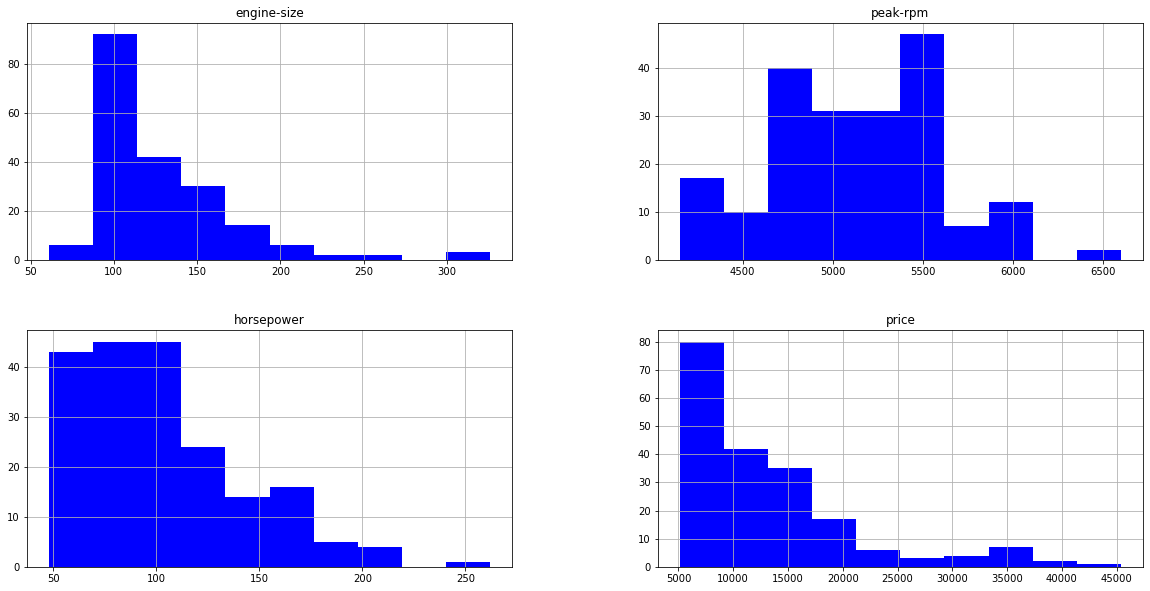

In [10]:
automobile_df[['engine-size','peak-rpm','horsepower','price']].hist(figsize=(20,10),bins=10,color='Blue')
plt.show()

### From the histograms above we find the following information.
- Engine Size in most vehicles is in the range from 60 to 190
- For mote vehicles the peak rpm is distributed between 4600 to 5700.
- Most vehicle has horsepower in the range from 50 to 125
- Most Vehicle are in the price range 5000 to 18000.


### Multivariate Analysis

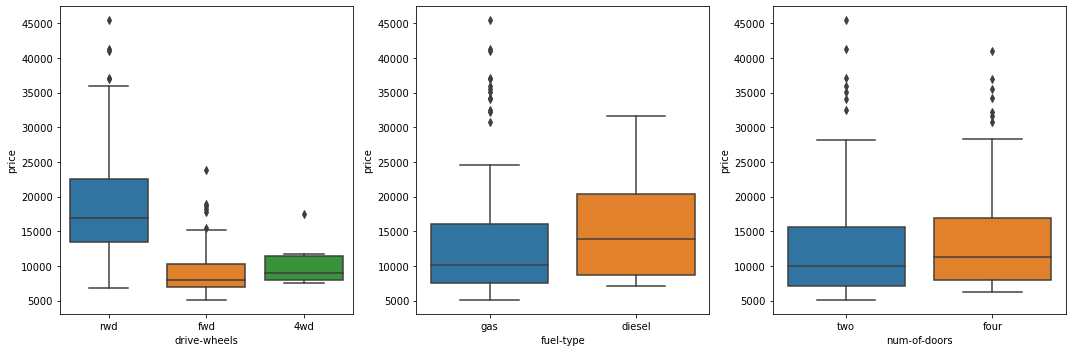

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
# boxplot to show relationship between 'drive-wheels' and 'price'
sns.boxplot(data=automobile_df, x='drive-wheels', y='price', ax=axes[0])
# boxplot to show relationship between 'fuel-type' and 'price'
sns.boxplot(data=automobile_df, x='fuel-type', y='price', ax=axes[1])
# boxplot to show relationship between 'drive-wheels' and 'price'
sns.boxplot(data=automobile_df, x='num-of-doors', y='price', ax=axes[2])
plt.tight_layout()

### Findings

From the boxplots above we find the following information.
- Rear wheel drive cars are generally more expensive compared to front wheel and four-wheel drive cars.
- Diesel cars are generally more expensive compared to gas cars.
- Four doors cars are generally slightly more expensive than two doors cars however generally the price difference is not significant.

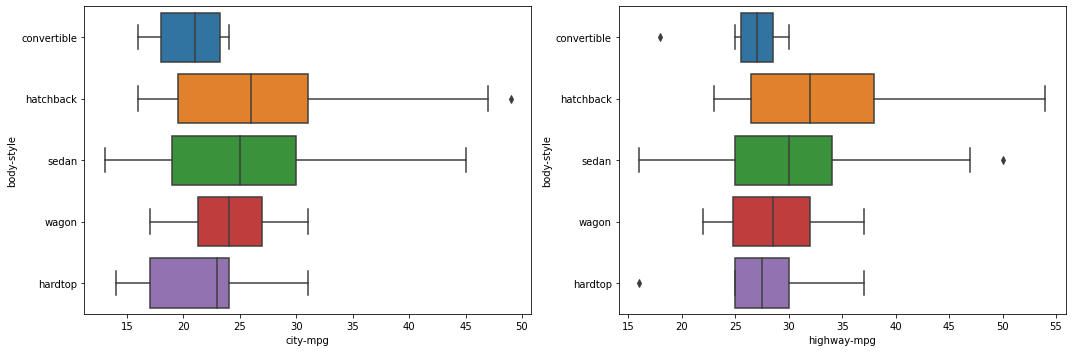

In [12]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

# boxplot to show relationship between 'aspiration' and 'city-mpg'
sns.boxplot(data=automobile_df, x='city-mpg', y='body-style', ax=axes[0])
# boxplot to show relationship between 'aspiration' and 'highway-mpg'
sns.boxplot(data=automobile_df, x='highway-mpg', y='body-style', ax=axes[1])
plt.tight_layout()

### Findings
From the boxplots above we find the following information.
- Hatchback followed by sedan provides higher mpg in city and on motorway compared to wagon, convertible and hardtop cars.


<AxesSubplot:xlabel='aspiration', ylabel='highway-mpg'>

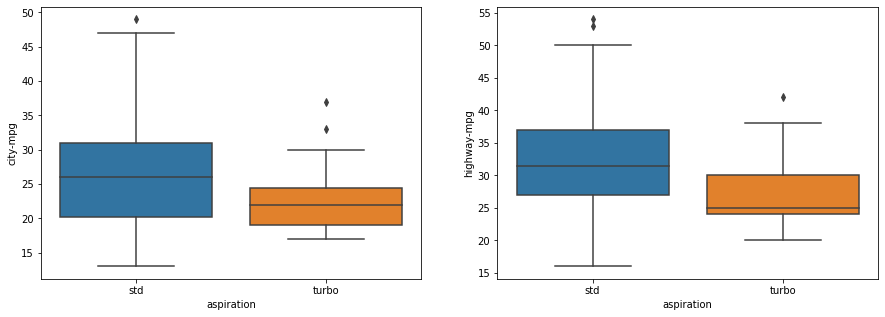

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

# boxplot to show relationship between 'aspiration' and 'city-mpg'
sns.boxplot(data=automobile_df, y='city-mpg', x='aspiration', ax=axes[0])
# boxplot to show relationship between 'aspiration' and 'highway-mpg'
sns.boxplot(data=automobile_df, y='highway-mpg', x='aspiration', ax=axes[1])

### Findings
From the boxplots above we find the following information.
- Standard aspiration cars are generally provides higher mpg in city ad on motorway compared to turbocharged engine cars.

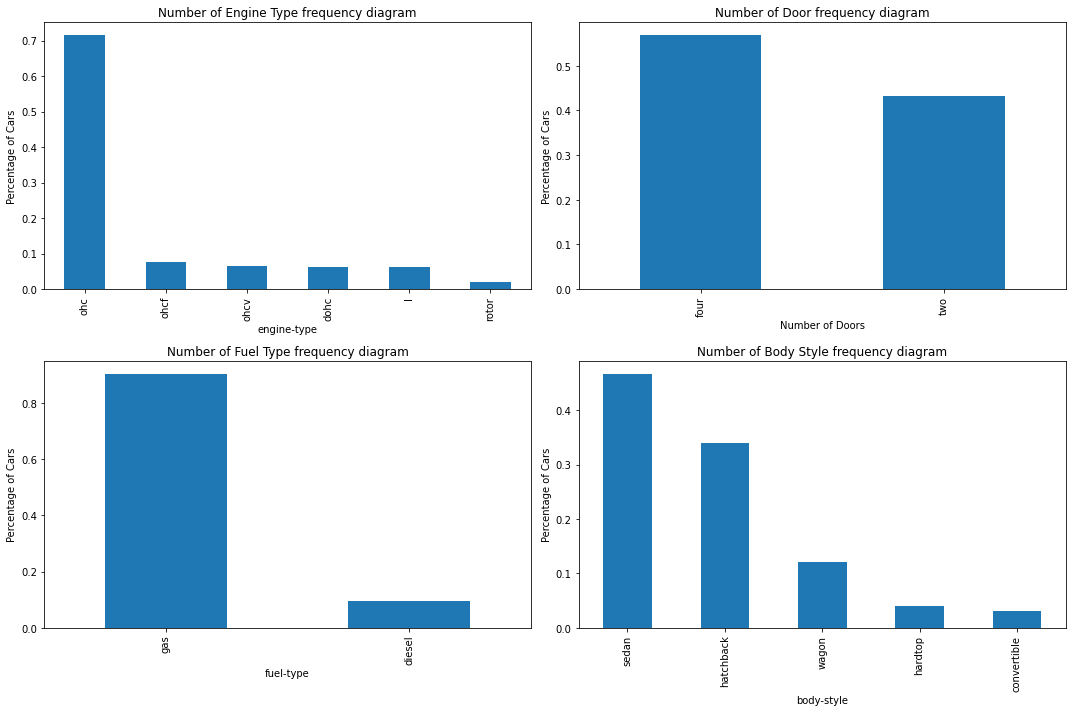

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Barchart to show occurence of 'engine-type'
ax = automobile_df['engine-type'].value_counts(normalize=True).plot(kind='bar', ax=axis[0,0])
ax.set_title("Number of Engine Type frequency diagram")
ax.set_ylabel('Percentage of Cars')
ax.set_xlabel('engine-type')

# Barchart to show occurence of 'Number of Doors'
ax = automobile_df['num-of-doors'].value_counts(normalize=True).plot(kind='bar', ax=axis[0,1])
ax.set_title("Number of Door frequency diagram")
ax.set_xlabel('Number of Doors')
ax.set_ylabel('Percentage of Cars')

# Barchart to show occurence of 'fuel-type'
ax = automobile_df['fuel-type'].value_counts(normalize=True).plot(kind='bar', ax=axis[1,0])
ax.set_title("Number of Fuel Type frequency diagram")
ax.set_ylabel('Percentage of Cars')
ax.set_xlabel('fuel-type')

# Barchart to show occurence of 'body-style'
ax = automobile_df['body-style'].value_counts(normalize=True).plot(kind='bar', ax=axis[1,1])
ax.set_title("Number of Body Style frequency diagram")
ax.set_ylabel('Percentage of Cars')
ax.set_xlabel('body-style')
plt.tight_layout()

### Findings

- More than 70 % of the vehicle has 'Ohc' type of Engine
- 57% of the cars has 4 doors
- Gas is preferred by 85 % of the vehicles
- Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

<Figure size 720x720 with 0 Axes>

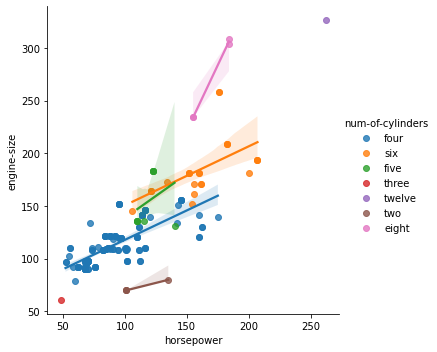

In [15]:
# Engine-size Vs Horsepower Analysis on Num-of-cylinders
fig = plt.figure(figsize=(10, 10))

# this Seaborn plot allows us to plot condition onto another variable
sns.lmplot(data=automobile_df, x="horsepower", y="engine-size", hue = "num-of-cylinders")

### Findings
From the scatter plot above we find the following information
- There is a linear relation between engine size and horsepower. However, this relation gets slightly weaker as the number of engine increases.

<AxesSubplot:>

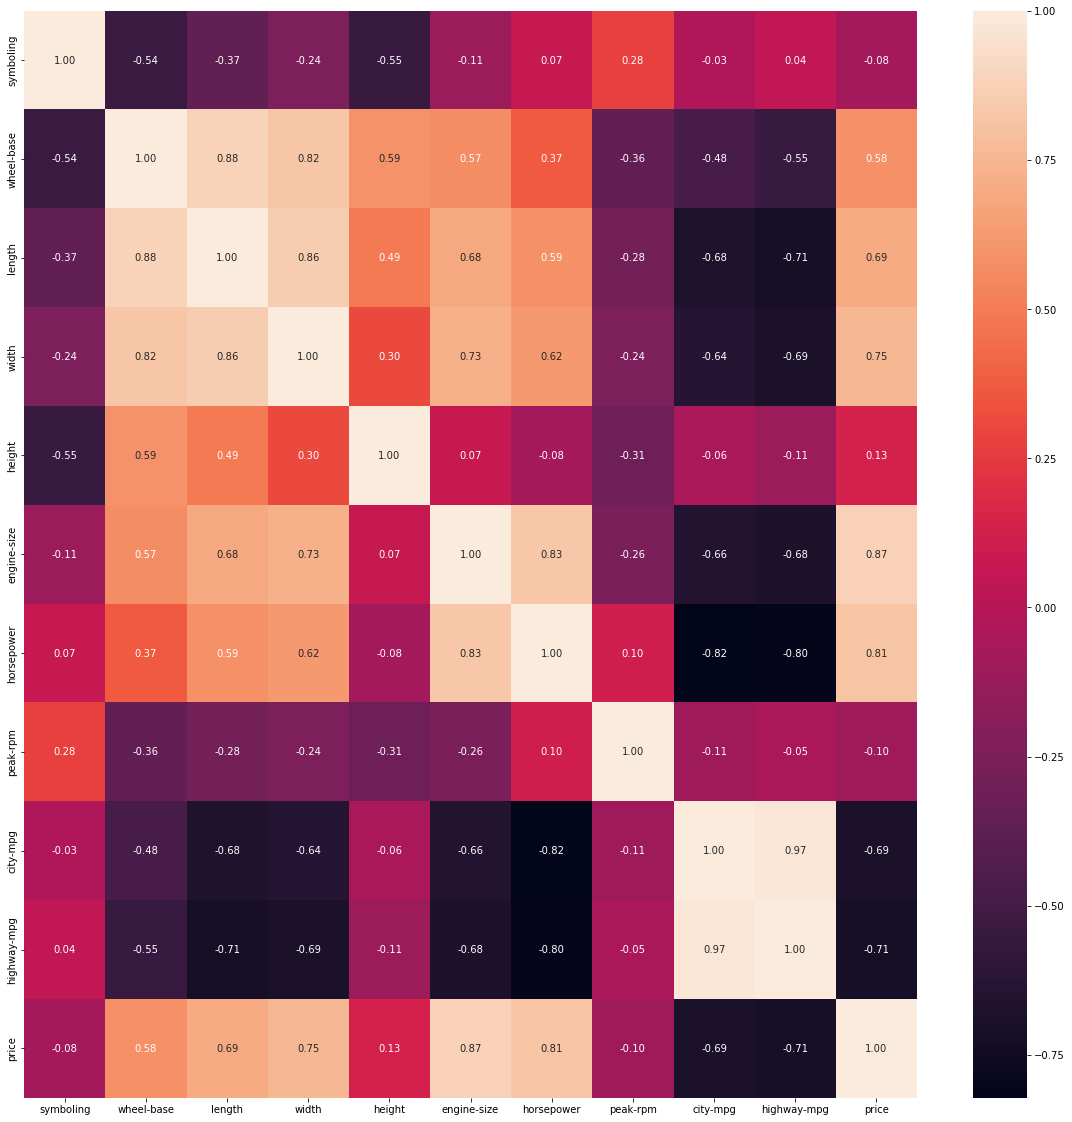

In [16]:
corr = automobile_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f')

### Findings

- There is a positive corelation between price, and car dimensions (i.e. length, width and height) as well as price, engine-size and horsepower .
- There is a strong positive corelation between car’s mpg in city and on motorway
- There is a negative corelation between car’s mpg in city and in motorway with car’s dimensions (i.e. length, width and height)
- There is no relation between price of a car and cars’ insurance risk rating (symbolling).
- There is a moderate negative corelation between cars’ insurance risk rating and car’s dimensions and wheelbase. Which means generally smaller cars tend to have higher risk rating.
